In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from datetime import datetime

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [11]:
# we take date time data rather than string data
def parse(X):
    return datetime.strptime(X, '%m/%d/%Y')

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv", 
                 parse_dates=['Bill_Date'], 
                 date_parser=parse)
df.head

<bound method NDFrame.head of     Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0  2016-01-01      365    1423.5        219.00         247.73            31
1  2016-02-01      292    1138.8        175.20         234.11            31
2  2016-03-01      130     507.0         78.00         123.85            29
3  2016-04-01      117     456.3         70.20         111.22            29
4  2016-05-01      136     530.4         81.60         118.37            29
5  2016-06-01       63     245.7         37.80          77.81            32
6  2016-07-01      110     429.0         66.00          86.67            30
7  2016-08-01      176     686.4        105.60         122.40            29
8  2016-09-01      357    1392.3        214.20         223.62            33
9  2016-10-01      235     916.5        141.00         152.54            29
10 2016-11-01      193     752.7        115.80         150.54            32
11 2016-12-01      344    1341.6        206.40         244

In [23]:
print("Rows         : ",df.shape[0])
print("Columns      : ",df.shape[1])
print("\nMissing :",df.isnull().sum())
print("\nUnique  :",df.nunique())
print("\ncolumns  :",df.columns)

Rows         :  53
Columns      :  6

Missing : Bill_Date        0
On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64

Unique  : Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64

columns  : Index(['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount',
       'Billing_days'],
      dtype='object')


In [24]:
bill_df = df.set_index("Bill_Date")

In [25]:
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [26]:
# lets take data from 2016 to 2018

bill_2018 = bill_df['2016':'2018'][['Billed_amount']]

In [27]:
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


# Moving Average

In [29]:
# simple moving average = ((t+(t-1)+(t-2)+.....+(t-n))/n)
# Also called rolling function
# window=3 means pick 3 data points and cal the mean
##### moving average is not great when data has lot of fluctation or its not stationary
bill_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [30]:
bill_2018['ma_rolling_3'] = bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)

In [31]:
bill_2018

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


<AxesSubplot:xlabel='Bill_Date'>

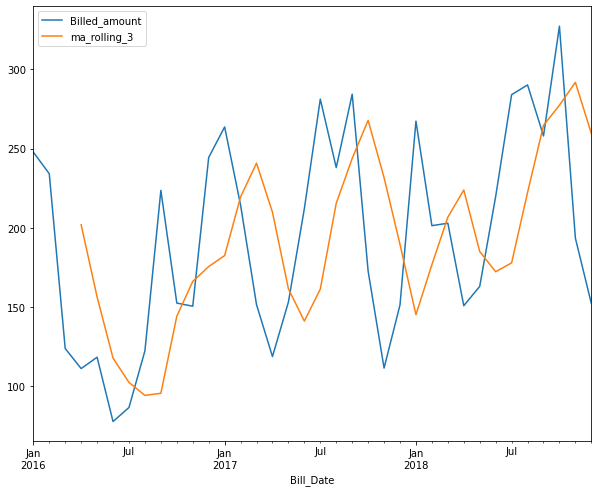

In [32]:
bill_2018.plot()

# weighted moving average

In [ ]:
## weighted moving average = (t*weighter factor)+((t-1)*weighter factor-1)+((t-n)*weighter factor-n)/n

In [37]:
## X is the target column. In our case it is Billed Amount

def wma(weights):
    def cal(X):
        return (weights*X).mean()
    return cal

In [38]:
# instead of cal mean I am caculating the weighters which I have provided
## latest data points I am saying assign 1.5 weights factor
## Old data points I am saying assign 0.5 weights factor

bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [39]:
# Lets concat results and see the performance

bill_2018['wma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [40]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


<AxesSubplot:xlabel='Bill_Date'>

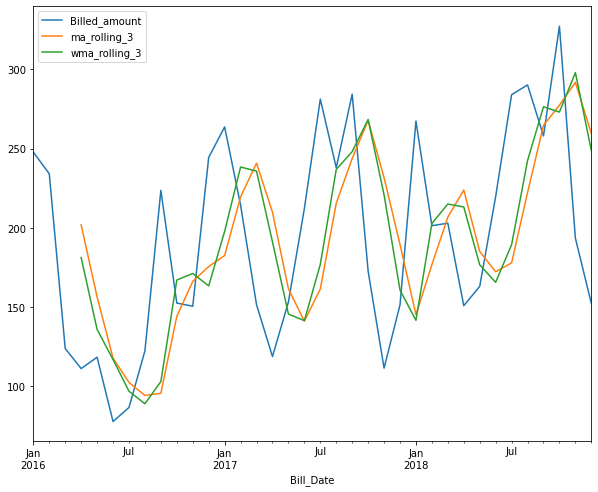

In [41]:
bill_2018.plot()

# Exponential moving Averages

In [42]:
## Exponential moving Averages = (Close-previous EMA)*(2/(span+1))+previous EMA

## its similar to weigh average but we dont assign weights.
## span is how many points you need or duration

##### Advantage -  1. Exponential moving Averages adapts more quickly to the data changes
#                  2. we dont have to decide weights also

In [44]:
bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean()

Bill_Date
2016-01-01    247.730000
2016-02-01    240.920000
2016-03-01    182.385000
2016-04-01    146.802500
2016-05-01    132.586250
2016-06-01    105.198125
2016-07-01     95.934063
2016-08-01    109.167031
2016-09-01    166.393516
2016-10-01    159.466758
2016-11-01    155.003379
2016-12-01    199.686689
2017-01-01    231.663345
2017-02-01    222.991672
2017-03-01    187.265836
2017-04-01    153.027918
2017-05-01    153.103959
2017-06-01    182.591980
2017-07-01    231.890990
2017-08-01    234.930495
2017-09-01    259.615247
2017-10-01    216.152624
2017-11-01    163.831312
2017-12-01    157.625656
2018-01-01    212.472828
2018-02-01    206.911414
2018-03-01    204.910707
2018-04-01    177.885353
2018-05-01    170.477677
2018-06-01    195.118838
2018-07-01    239.549419
2018-08-01    264.849710
2018-09-01    261.404855
2018-10-01    294.297427
2018-11-01    243.893714
2018-12-01    198.116857
Name: Billed_amount, dtype: float64

In [45]:
bill_2018['ewe_window_3'] = bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [46]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewe_window_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,181.250000,182.385000
2016-05-01,118.37,156.393333,135.911667,146.802500
2016-06-01,77.81,117.813333,116.900000,132.586250
2016-07-01,86.67,102.466667,96.898333,105.198125
2016-08-01,122.40,94.283333,89.000000,95.934063
2016-09-01,223.62,95.626667,103.058333,109.167031


<AxesSubplot:xlabel='Bill_Date'>

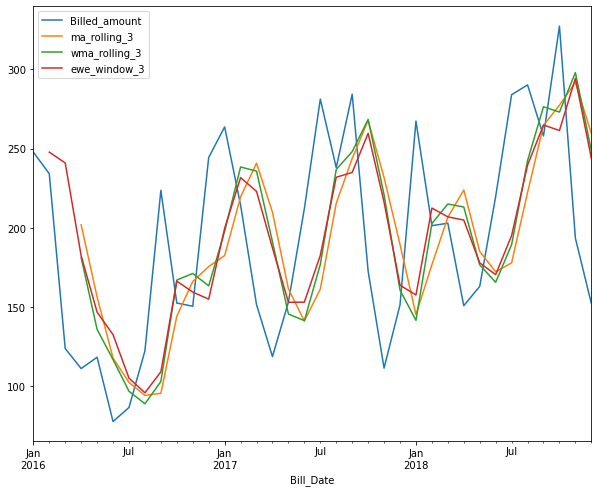

In [47]:
bill_2018.plot()

# Exponential smoothing Averages

In [48]:
### Exponential smoothing Averages 
## concept of (alpha) is presentrnge from 0 to 1. Larger value of alpha means model is paying attention on recent data points.

bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    158.153800
2016-04-01    125.300140
2016-05-01    120.449042
2016-06-01     90.601713
2016-07-01     87.849514
2016-08-01    112.034854
2016-09-01    190.144456
2016-10-01    163.821337
2016-11-01    154.524401
2016-12-01    217.416320
2017-01-01    249.772896
2017-02-01    224.955869
2017-03-01    173.564761
2017-04-01    135.222428
2017-05-01    147.792728
2017-06-01    192.793819
2017-07-01    254.671146
2017-08-01    242.980344
2017-09-01    271.904103
2017-10-01    202.454231
2017-11-01    138.793269
2017-12-01    147.631981
2018-01-01    231.413594
2018-02-01    210.369078
2018-03-01    205.147723
2018-04-01    167.146317
2018-05-01    164.292895
2018-06-01    203.119869
2018-07-01    259.721961
2018-08-01    281.021588
2018-09-01    264.878476
2018-10-01    308.496543
2018-11-01    227.991963
2018-12-01    175.035589
Name: Billed_amount, dtype: float64

In [49]:
bill_2018['esm_window_3_7'] = bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods=3).mean().shift(1)

In [50]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewe_window_3,esm_window_3_7
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,158.153800
2016-05-01,118.37,156.393333,135.911667,146.802500,125.300140
2016-06-01,77.81,117.813333,116.900000,132.586250,120.449042
2016-07-01,86.67,102.466667,96.898333,105.198125,90.601713
2016-08-01,122.40,94.283333,89.000000,95.934063,87.849514
2016-09-01,223.62,95.626667,103.058333,109.167031,112.034854


<AxesSubplot:xlabel='Bill_Date'>

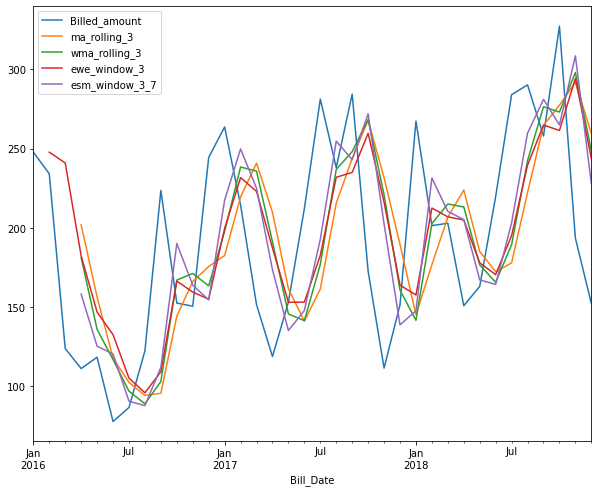

In [51]:
bill_2018.plot()

<AxesSubplot:xlabel='Bill_Date'>

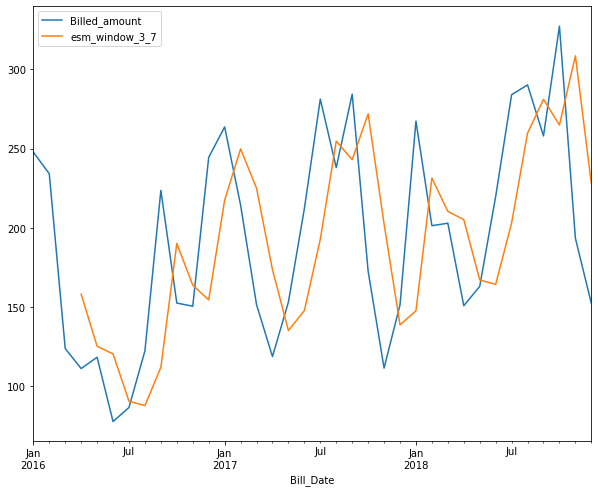

In [53]:
# its difficult to visualize it. Lets take only 2
bill_2018[['Billed_amount','esm_window_3_7']].plot()

In [54]:
# in exponential smoothing average, lets reduce the alpha value to check the results.

bill_2018['esm_window_3_3'] = bill_2018['Billed_amount'].ewm(alpha=0.3, adjust=False, min_periods=3).mean().shift(1)

In [55]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewe_window_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,158.153800,207.705800
2016-05-01,118.37,156.393333,135.911667,146.802500,125.300140,178.760060
2016-06-01,77.81,117.813333,116.900000,132.586250,120.449042,160.643042
2016-07-01,86.67,102.466667,96.898333,105.198125,90.601713,135.793129
2016-08-01,122.40,94.283333,89.000000,95.934063,87.849514,121.056191
2016-09-01,223.62,95.626667,103.058333,109.167031,112.034854,121.459333


<AxesSubplot:xlabel='Bill_Date'>

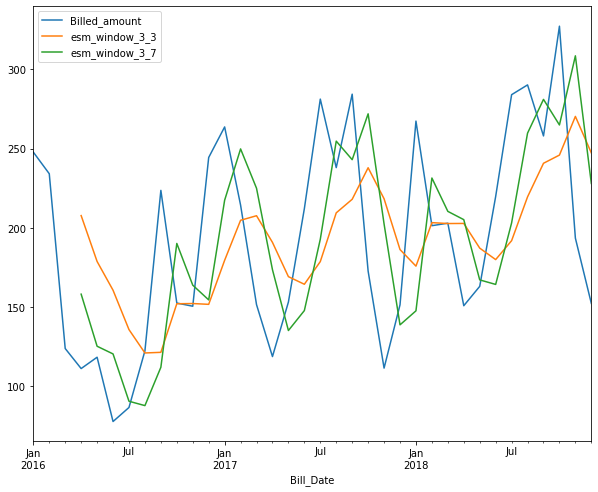

In [56]:
# graph show results of both. low and high alpha values
## if is our data set we have very much fluctation then we should reduce thye alpha value.

bill_2018[['Billed_amount','esm_window_3_3','esm_window_3_7']].plot()

In [57]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewe_window_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,158.153800,207.705800
2016-05-01,118.37,156.393333,135.911667,146.802500,125.300140,178.760060
2016-06-01,77.81,117.813333,116.900000,132.586250,120.449042,160.643042
2016-07-01,86.67,102.466667,96.898333,105.198125,90.601713,135.793129
2016-08-01,122.40,94.283333,89.000000,95.934063,87.849514,121.056191
2016-09-01,223.62,95.626667,103.058333,109.167031,112.034854,121.459333


# Calculate RMSE for all averages

In [63]:
((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

70.98561687433802

In [64]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

65.82572602256133

In [71]:
((bill_2018['Billed_amount']-bill_2018['ewe_window_3'])**2).mean()**0.5

64.32131239414655

In [70]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_7'])**2).mean()**0.5

61.26408398853503

In [72]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_3'])**2).mean()**0.5

65.22424423118377